# Affinity Propagation creates clusters by sending messages between data points until convergence.

#### Published in: 

#### Frey, B. J., & Dueck, D. (2007). Clustering by passing messages between data points. Science, 315(5814), 972-976.

In [1]:
# This first study was based in this one: 
# https://michael-fuchs-python.netlify.app/2020/06/29/affinity-propagation/

# First study

In [2]:
# Import modules
import pandas as pd
import numpy as np

# For generating some data
from sklearn.datasets import make_blobs # Generate isotropic Gaussian blobs for clustering.
from matplotlib import pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Something that is isotropic has the same size or physical properties when it is measured in different directions

### Parameter "cmap" of scatter:

#### cmap: str or Colormap, default: rcParams["image.cmap"] (default: 'viridis')

#### The Colormap instance or registered colormap name used to map scalar data to colors.

#### This parameter is ignored if c is RGB(A).

/tmp/ipykernel_11880/2661387571.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


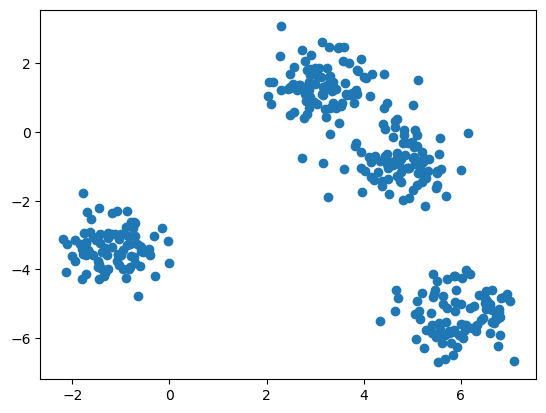

In [3]:
# Generating some test data
X, y = make_blobs(n_samples=350, centers=4, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

#### Affinity Propagation is only getting more and more popular due to its simplicity, general applicability, and performance.

#### Affinity Propagation does not require you to specify the number of clusters. Affinity Propagation, instead, takes as input measures of similarity between pairs of data points, and simultaneously considers all data points as potential exemplars.



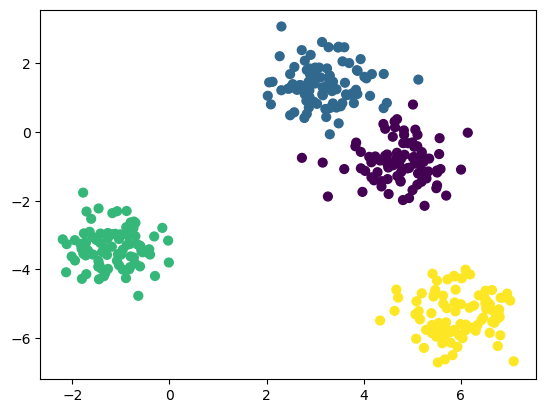

In [4]:
# AffinityPropagation. Perform Affinity Propagation Clustering of data.
afprop  = AffinityPropagation(preference=-50)
afprop.fit(X)
labels = afprop.predict(X)
# Visualization of clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis') # Parameter c is the marker colors

In [5]:
# Parameter s. float or array-like, shape (n, ), optional
# The marker size in points**2 (typographic points are 1/72 in.). Default is rcParams['lines.markersize'] ** 2.

### Parameter "preference" of AffinityPropagation.
#### array-like of shape (n_samples,) or float, default=None
#### Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, ie of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

In [6]:
# One the class attributes is cluster_center_indices_:
cluster_centers_indices = afprop.cluster_centers_indices_
cluster_centers_indices

array([ 42, 115, 230, 265])

In [7]:
# This allows the identified clusters to be calculated.
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


In [8]:
# With the following command we’ll receive the calculated cluster centers:
afprop.cluster_centers_

array([[ 4.73183103, -0.9280406 ],
       [ 3.2505792 ,  1.35990279],
       [-1.18801937, -3.33882696],
       [ 5.89093265, -5.22498177]])

In [9]:
# Last but not least some performance metrics:

In [10]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 4
Homogeneity: 0.969
Completeness: 0.969
V-measure: 0.969
Adjusted Rand Index: 0.977
Adjusted Mutual Information: 0.969
Silhouette Coefficient: 0.881


# Glossary

### Homogeneity score

#### A clustering result is said to be homogeneous if it contains data points that are members of a single class.
#### A homogeneity score is a number between 0 and 1. A low value indicates low homogeneity and a high value indicates high homogeneity. A homogeneity score of 1 indicates perfectly homogeneous labeling.

### Ground truth

#### Ground truth in machine learning refers to the reality you want to model with your supervised machine learning algorithm. 
#### Ground truth is also known as the target for training or validating the model with a labeled dataset. 

### Completeness score

#### The completeness score of clustering indicates whether all the data points that are members of a given class belong to the same cluster.
#### It is a floating point number between 0 and 1. A completeness score of 1 indicates that all samples with the same true label are assigned to the same cluster, and a completeness score of 0 indicates poor clustering. 

### V-measure

#### It is the harmonic mean between the homogeneity score and the completeness score.

#### The V-measure score is also a number between 0 and 1. A number close to 1 means more perfect labeling. 

#### This score is identical to normalized_mutual_info_score with the 'arithmetic' option for averaging.

### Adjusted Rand Index (ARI)

#### The Adjusted Rand Index (ARI) is a measure of the similarity between two data clusterings. It is a correction of the Rand Index, which is a basic measure of similarity between two clusterings, but it has the disadvantage of being sensitive to chance. The Adjusted Rand Index takes into account the fact that some agreement between two clusterings can occur by chance, and it adjusts the Rand Index to account for this possibility. 

#### ARI >= 0.90 excellent recovery; 0.80 =< ARI < 0.90 good recovery;0.65 =< ARI < 0.80 moderate recovery; ARI < 0.65 poor recovery.

#### It is an extrinsic measure.

#### Returns a single value between 0 and 1. A higher score signifies higher similarity.

### Adjusted mutual information (AMI) score

#### Use AMI when the ground truth clustering is unbalanced and there exist small clusters. It is introduced to measure discrepancies in clustering results between neighboring configurations.

#### Adjusted Mutual Information (AMI) is an adjustment of the Mutual Information score that accounts for chance. It corrects the effect of agreement solely due to chance between clusterings, similar to the way the Adjusted Rand Index corrects the Rand Index. It is closely related to variation of information. The adjusted measure, however, is no longer metrical.

#### The AMI provides a value between 0 and 1, where 0 indicates that the groupings are independent and unrelated to each other, while 1 indicates that the groupings are identical. The higher the AMI value, the greater the similarity between the clusters.

### Chance

#### Chance is the occurrence of events in the absence of any obvious intention or cause. It is, simply, the possibility of something happening. When the chance is defined in Mathematics, it is called probability.

In [11]:
# Viewing the contents of the X matrix
X

array([[-2.19858072, -3.12523782],
       [ 5.55517616, -0.63986469],
       [ 5.33152016, -1.1469186 ],
       [ 2.81986479,  0.91260154],
       [ 3.65517985,  1.07677218],
       [ 6.80242708, -5.39015664],
       [-0.8907127 , -2.7704307 ],
       [ 5.5643921 , -0.17686406],
       [ 2.4742337 ,  1.27357528],
       [ 5.19765466, -0.58203233],
       [-0.70210372, -3.03447916],
       [ 4.50679575, -1.03202098],
       [ 4.77072757, -0.77697822],
       [ 4.81037758, -1.98055446],
       [ 5.89504442, -4.59073011],
       [ 5.49680731, -1.63442726],
       [ 6.82240132, -4.82920515],
       [-0.02751976, -3.16101484],
       [ 5.10617681, -1.53194385],
       [ 3.84106027,  1.23245971],
       [ 4.49324026, -1.3690883 ],
       [-1.71925712, -3.22071064],
       [-1.6603766 , -3.50211882],
       [ 3.29190616,  1.29968483],
       [ 4.68786703,  0.37651395],
       [ 6.49126335, -4.83589645],
       [ 2.82839349,  0.53246367],
       [ 4.83341695, -0.07999272],
       [ 5.86117498,

In [12]:
# The ":" notation in X[:, 0] indicates that we want to select all elements in a given dimension.
X[:, 0]

array([-2.19858072,  5.55517616,  5.33152016,  2.81986479,  3.65517985,
        6.80242708, -0.8907127 ,  5.5643921 ,  2.4742337 ,  5.19765466,
       -0.70210372,  4.50679575,  4.77072757,  4.81037758,  5.89504442,
        5.49680731,  6.82240132, -0.02751976,  5.10617681,  3.84106027,
        4.49324026, -1.71925712, -1.6603766 ,  3.29190616,  4.68786703,
        6.49126335,  2.82839349,  4.83341695,  5.86117498,  2.77867493,
        3.60018611,  3.87470874,  3.48540926, -1.45089601, -1.39918074,
        5.87557324,  6.03782147,  2.72779569, -0.57983403,  6.72701592,
        6.19286707,  2.44179455,  4.73183103, -1.94895364,  5.01470413,
       -1.71350135,  2.67311274,  5.79279338,  5.40912605,  5.49590064,
        4.67758792,  3.47161964,  3.36805549, -1.77442714,  4.81495251,
        3.22866337,  2.99312435, -0.55531705,  5.45695266,  3.97518086,
       -0.82135051,  5.2805873 ,  6.09922505,  2.8283531 ,  5.10468015,
        6.64900968,  6.76261916,  2.90843576,  6.60192276, -1.05

In [13]:
X.shape

(350, 2)

In [14]:
X[:, 1].shape

(350,)

In [15]:
# the ":" before the comma means that we want to select all elements along the axis of the lines (first dimension).
X[:, 1]

array([-3.12523782, -0.63986469, -1.1469186 ,  0.91260154,  1.07677218,
       -5.39015664, -2.7704307 , -0.17686406,  1.27357528, -0.58203233,
       -3.03447916, -1.03202098, -0.77697822, -1.98055446, -4.59073011,
       -1.63442726, -4.82920515, -3.16101484, -1.53194385,  1.23245971,
       -1.3690883 , -3.22071064, -3.50211882,  1.29968483,  0.37651395,
       -4.83589645,  0.53246367, -0.07999272, -4.18885726,  0.41174441,
       -1.07681443,  1.78386771,  0.25512277, -3.84399564, -3.98172579,
       -4.96415711, -6.00269344, -0.74986955, -3.45444694, -5.45561531,
       -4.14793509,  1.26318296, -0.9280406 , -3.1480872 , -0.74537128,
       -4.13862826,  1.36285782, -6.13660956, -5.62042592, -5.9600008 ,
       -0.75265626,  2.46416899,  1.46832702, -3.54221762, -0.32139291,
        0.43915885,  1.41491   , -3.50181426, -4.71490608, -1.74227578,
       -3.26446458, -0.7700135 , -4.00809792,  1.80857451, -0.41042977,
       -5.523907  , -6.23364342,  2.24993352, -5.01845368, -3.56

# Second study

In [16]:
# Open the CSV file contaning the dataset
creditcard_df = pd.read_csv('/home/andre/Desktop/DataScience/Curso Ciência de dados para empresas e negócios/Departamento de vendas/CC GENERAL.csv')

In [17]:
# sum the null records
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Data Treatment and Transformation of null records

In [18]:
creditcard_df['MINIMUM_PAYMENTS'].mean() # It Estimates the mean for MINIMUM_PAYMENTS

864.2065423050828

In [19]:
# Finds the null records and replaces them with the mean.
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [20]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [21]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [22]:
# axis = 1. to drop labels from the columns (1 or ‘columns’).
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [23]:
# Show the column labels of the DataFrame.
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [24]:
# creating a list with column names
lista = list(creditcard_df.columns)
lista

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [25]:
# StandardScaler. Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [26]:
# Use autoencoder to reduce 17 attributes to 10
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model # Model used for neural networking

2023-07-04 19:55:52.474096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 19:55:52.665042: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-04 19:55:52.665063: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-04 19:55:53.442975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [27]:
input_df = Input(shape=(17,)) # input is the input layer, which 17 neurons, same number of the attributes
x = Dense(500, activation='relu')(input_df) # (input_df) entered says the input layer is connected to the Dense 500, it's a different form of syntax.
x = Dense(2000, activation='relu')(x) # dense means that the neuron is connected with all other neurons in the other layer.

encoded = Dense(10, activation='relu')(x) # information storage layer linked to the previous ones with (x).

# decoding
x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x) # layer decoded, output 17 registers.

2023-07-04 19:55:54.252887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-04 19:55:54.252909: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-04 19:55:54.252929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (andre-Inspiron-15-3567): /proc/driver/nvidia/version does not exist
2023-07-04 19:55:54.253152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# autoencoder
autoencoder = Model(input_df, decoded) # input_df is the first layer and decoded is the last layer

In [29]:
# encoder
encoder = Model(input_df, encoded) # Will store only the storage layer.

In [30]:
# loss = 'mean_squared_error' will square the error.
# compile. Configures the model for training.
# optimizer. Will adjust the weights.
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [31]:
# This builds the model for the first time
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)
# Used two times to compare the input with the input, creditcard_df_scaled

Epoch 1/50
280/280 [==============================] - 7s 22ms/step - loss: 0.2593
Epoch 2/50
280/280 [==============================] - 6s 20ms/step - loss: 0.1168
Epoch 3/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0919
Epoch 4/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0829
Epoch 5/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0892
Epoch 6/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0774
Epoch 7/50
280/280 [==============================] - 5s 19ms/step - loss: 0.0640
Epoch 8/50
280/280 [==============================] - 6s 23ms/step - loss: 0.0553
Epoch 9/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0531
Epoch 10/50
280/280 [==============================] - 6s 22ms/step - loss: 0.0573
Epoch 11/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0650
Epoch 12/50
280/280 [==============================] - 6s 23ms/step - loss: 0.0963
Epoch 13/50
2

In [32]:
# predict. Generates output predictions for the input samples.
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 2ms/step


# Using affinity propagation for clustering

In [54]:
segmentacao  = AffinityPropagation(preference=-1000, max_iter = 250, random_state=0)
segmentacao.fit(compact)
labels1 = segmentacao.predict(compact)

### damping float, default=0.5

#### Damping factor in the range [0.5, 1.0) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

In [55]:
# Returns the created clusters and the sum of each one of them
np.unique(labels1, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  19,  947,  364,  284,  413, 1101, 3840,  589, 1282,   85,   26]))

In [56]:
from sklearn.decomposition import PCA
# PCA with dimensionality reduction
pca = PCA(n_components=2) #n_components. Number of components to keep.
principal_comp = pca.fit_transform(compact)
principal_comp

array([[-1.263062  , -0.12432577],
       [ 0.06795583, -1.0506968 ],
       [-1.4747057 ,  0.9644674 ],
       ...,
       [ 2.7140698 , -1.694541  ],
       [ 1.8908701 , -2.3375823 ],
       [ 4.332573  , -2.444798  ]], dtype=float32)

In [57]:
# Create a dataframe for the principal components
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.263062,-0.124326
1,0.067956,-1.050697
2,-1.474706,0.964467
3,-0.598344,-0.016679
4,-1.523639,0.042711


In [58]:
# Concatenate the two dataframes with the components and which cluster they belong to.
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels1})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.263062,-0.124326,6
1,0.067956,-1.050697,8
2,-1.474706,0.964467,6
3,-0.598344,-0.016679,6
4,-1.523639,0.042711,6


/tmp/ipykernel_11880/3013121649.py:5: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'orange', 'gray', 'purple', 'black', 'brown', 'yellow', 'aquamarine', 'lime']);


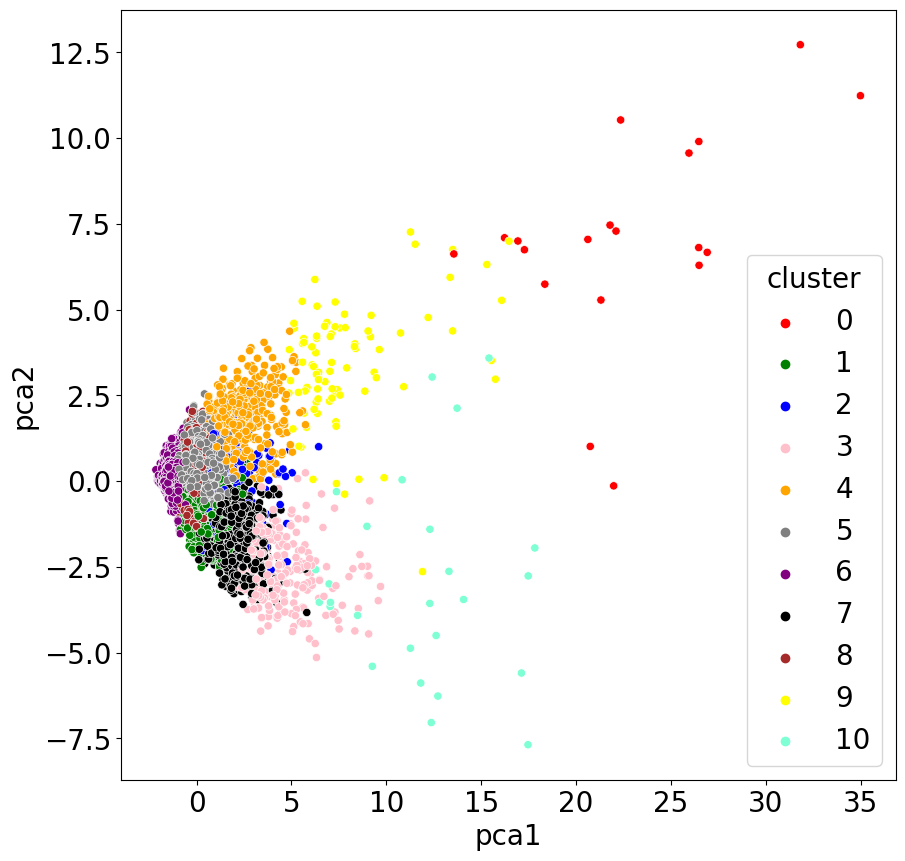

In [59]:
# Parameter hue of scatterplot. Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
import seaborn as sns
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'orange', 'gray', 'purple', 'black', 'brown', 'yellow', 'aquamarine', 'lime']);

In [60]:
# One the class attributes is cluster_center_indices_:
grupos_centers_indices = segmentacao.cluster_centers_indices_
grupos_centers_indices

array([ 273,  659, 1114, 2269, 3576, 3714, 5550, 5956, 6204, 6640, 7254])

In [61]:
# This allows the identified clusters to be calculated.
n_grupos_ = len(grupos_centers_indices)

print('Estimated number of clusters: %d' % n_grupos_)

Estimated number of clusters: 11


In [62]:
# With the following command we’ll receive the calculated cluster centers:
segmentacao.cluster_centers_

array([[ 0.        ,  0.        ,  6.3167024 ,  7.9961343 ,  8.18438   ,
         0.        ,  7.196395  ,  0.        , 12.226272  , 18.028925  ],
       [ 0.        ,  0.        ,  0.5394644 ,  1.3536264 ,  0.2668546 ,
         0.        ,  2.8039465 ,  0.        ,  1.1000583 ,  0.7507361 ],
       [ 0.        ,  0.        ,  1.0556793 ,  1.6589037 ,  3.2222075 ,
         0.        ,  1.3829788 ,  0.        ,  1.1862465 ,  0.94244796],
       [ 0.        ,  0.        ,  1.9906527 ,  4.5728602 ,  2.1518211 ,
         0.        ,  4.4008965 ,  0.        ,  2.5792737 ,  0.4680416 ],
       [ 0.        ,  0.        ,  1.3966326 ,  1.3856037 ,  1.704954  ,
         0.        ,  1.0920707 ,  0.        ,  3.4236746 ,  2.6838794 ],
       [ 0.        ,  0.        ,  0.50459534,  0.9614785 ,  0.40492836,
         0.        ,  1.2456987 ,  0.        ,  2.2391188 ,  0.64097404],
       [ 0.        ,  0.        ,  0.51042145,  0.5715815 ,  0.4845136 ,
         0.        ,  0.73016745,  0.        

In [63]:
y = segmentacao.labels_  
labels1 = segmentacao.predict(compact) 

In [64]:
# Metrics
print('Estimated number of clusters: %d' % n_grupos_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels1))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels1))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels1))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels1))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels1))

Estimated number of clusters: 11
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000


In [65]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(compact, labels1, metric='sqeuclidean'))

Silhouette Coefficient: 0.359


In [66]:
# affinity_matrix_ . Stores the affinity matrix used in fit.
segmentacao.affinity_matrix_

array([[-1000.0002   ,    -4.152905 ,    -2.0704448, ...,   -22.268137 ,
          -17.694939 ,   -41.183537 ],
       [   -4.152905 ,  -999.9999   ,    -7.4847198, ...,   -16.430187 ,
          -12.34044  ,   -28.762442 ],
       [   -2.070444 ,    -7.484721 ,  -999.9998   , ...,   -31.69899  ,
          -26.332592 ,   -49.924187 ],
       ...,
       [  -22.268135 ,   -16.430191 ,   -31.698997 , ..., -1000.0002   ,
           -2.4115658,    -6.4416547],
       [  -17.69494  ,   -12.340443 ,   -26.332592 , ...,    -2.4115655,
        -1000.0002   ,    -6.5505643],
       [  -41.183537 ,   -28.76244  ,   -49.92419  , ...,    -6.4416523,
           -6.550564 , -1000.0001   ]], dtype=float32)

In [67]:
segmentacao.affinity_matrix_.shape

(8950, 8950)

In [68]:
segmentacao.affinity_matrix_[:,0]

array([-1000.0002  ,    -4.152905,    -2.070444, ...,   -22.268135,
         -17.69494 ,   -41.183537], dtype=float32)

In [69]:
segmentacao.affinity_matrix_[:,1]

array([  -4.152905, -999.9999  ,   -7.484721, ...,  -16.430191,
        -12.340443,  -28.76244 ], dtype=float32)

In [70]:
# Inserts in the original dataframe the information of the groups classified by affinity propagation
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels1})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,8
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


In [71]:
# sort_values(). Sort by the values along either axis.
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3937,2997.977825,1.0,35131.16,34087.73,1043.43,0.000000,1.0,1.000000,0.833333,0.000000,0,344,12000.0,28896.66522,767.014180,0.750000,12,0
550,11547.520010,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.000000,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.250000,12,0
1641,3454.094319,1.0,31299.35,19064.30,12235.05,0.000000,1.0,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12,0
1190,1893.611922,1.0,22746.81,15795.42,6951.39,0.000000,1.0,1.000000,1.000000,0.000000,0,140,18000.0,22558.28457,505.125031,1.000000,12,0
970,3108.393701,0.9,26582.34,15158.90,11423.44,0.000000,0.9,0.800000,0.800000,0.000000,0,55,28000.0,26557.09724,586.029097,0.875000,10,0


In [75]:
# Select the rows containing only the customers from group one
cluster1 = creditcard_df_cluster.loc[creditcard_df_cluster['cluster'] == 1]
cluster1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,1
17,41.089489,0.454545,519.00,0.00,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.25,12,1
63,7.152356,0.090909,840.00,840.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,864.206542,0.00,12,1
73,1808.972419,1.000000,713.90,503.08,210.82,0.000000,0.500000,0.100000,0.400000,0.000000,0,8,2250.0,889.017418,622.757696,0.00,10,1
81,81.584711,0.272727,0.00,0.00,0.00,2985.300006,0.000000,0.000000,0.000000,0.166667,5,0,9500.0,116.569033,164.692136,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,48.161019,0.777778,318.05,166.80,151.25,0.000000,0.444444,0.111111,0.222222,0.000000,0,8,1200.0,425.122515,72.507248,0.00,9,1
8829,17.097059,0.333333,306.25,0.00,306.25,0.000000,0.777778,0.000000,0.666667,0.000000,0,7,1500.0,711.607214,41.249133,0.25,9,1
8832,7.472600,0.333333,63.40,35.09,28.31,0.000000,0.222222,0.111111,0.111111,0.000000,0,2,500.0,83.417439,106.028116,0.00,9,1
8833,281.877648,0.666667,0.00,0.00,0.00,489.527383,0.000000,0.000000,0.000000,0.111111,1,0,500.0,236.503747,157.063207,0.00,9,1


In [74]:
# Finding the number of costumers containing in group one
cluster1.count()[0]

947

# Some Applications of Clustering

## Clustering has wide applications in:

- [1] Pattern Recognition
- [2] Spatial Data Analysis:
- [3] Image Processing
- [4] Economic Science (especially market research)
- [5] Document classification
- [6] Cluster Web log data to discover groups of similar access patterns